In [70]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [71]:
%pip show tensorflow

Name: tensorflow
Version: 2.16.2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /home/sandeep/.local/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [72]:
import numpy as np
import pandas as pd
# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [73]:
import tensorflow as tf
from tensorflow import keras

In [74]:
keras.__version__

'3.4.1'

In [75]:
tf.__version__

'2.16.2'

## Image classifier using neural networks

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

<!-- ![image.png](attachment:image.png) -->

### Usage:
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns:
2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [76]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [77]:
X_train_full[0].shape

(28, 28)

In [78]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

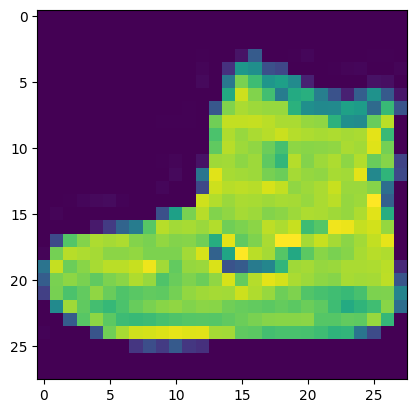

In [79]:
plt.imshow(X_train_full[0]) # 1st picture       

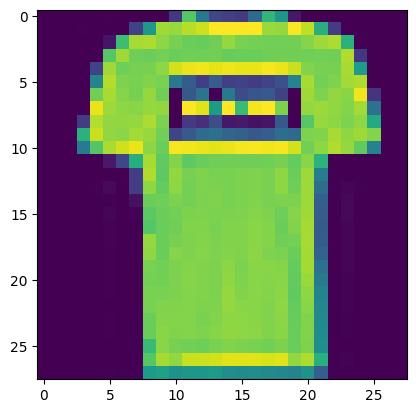

In [80]:
plt.imshow(X_train_full[1]) # 2nd picture in training data

In [81]:
y_train_full[0] # returns the index of class of which 1st image belongs to

9

In [82]:
class_names = ["T-shirt/top", "Trouser", 
            "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [83]:
class_names[y_train_full[0]], class_names[y_train_full[1]]

('Ankle boot', 'T-shirt/top')

### Data normalization
normalizing the data dimensions so that they are of approximately of same scale

In [84]:
X_train_n = X_train_full / 255.0 # 255 stands for completely white pixel and 0 - black
X_test_n  = X_test / 255.0 

In [85]:
# here as we know that the pixel maximum is 255, we can directly normalize the data as shown abive

In [86]:

X_test_n

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [87]:
X_train_n.shape # 60,000 training samples

(60000, 28, 28)

In [88]:
X_test_n.shape # 10,000 training samples

(10000, 28, 28)

### splitting the data into train/validation/test

- validation set is use for tuning the hyperparameters and evaluate the models

In [89]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000: ]  
# 5000 for validation, 55000 for training and 10000 for testing
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

### Create the model architecture
There are two APIs for defining a model in Keras:
* Sequential model API
* Functional API

In [90]:
np.random.seed(42)
tf.random.set_seed(42)

In [91]:
# we have image of (28 * 28) pixel
# there are 10 categories in the output

input layer
---> hidden layer 1
---> hidden layer 2
---> Output layer 

In [92]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))     # input layer
model.add(keras.layers.Dense(300, activation = "relu"))     # hidden layer 1
model.add(keras.layers.Dense(150, activation = "relu"))     # hidden layer 2
model.add(keras.layers.Dense(10, activation = "softmax"))   # output layer 

/home/sandeep/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [93]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,160 (1.08 MB)

 Trainable params: 282,160 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [94]:
import pydot

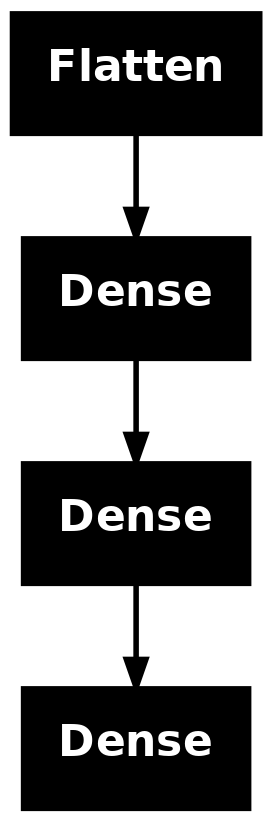

In [95]:
keras.utils.plot_model(model)


In [96]:
weights, biases = model.layers[3].get_weights()

In [97]:
weights

array([[-0.18661755, -0.15030819, -0.03468913, ...,  0.07466191,
         0.03319374,  0.16923475],
       [ 0.08949074, -0.02537575,  0.0371073 , ..., -0.05840209,
         0.09492451, -0.03792012],
       [ 0.16377649,  0.14801297,  0.12348977, ...,  0.00962493,
        -0.13992327,  0.12826967],
       ...,
       [ 0.04130217,  0.06776565,  0.05476665, ...,  0.08173388,
        -0.16993788,  0.00874886],
       [-0.09506262, -0.18999684, -0.15266284, ..., -0.06182201,
        -0.0458997 ,  0.06586245],
       [ 0.1325269 ,  0.17228118, -0.0331347 , ..., -0.18111968,
         0.1830652 ,  0.18313444]], dtype=float32)

In [98]:
weights.shape

(150, 10)

In [99]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [100]:
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = "sgd", 
              metrics = ["accuracy"])


In [101]:
model_history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))
# we can use class weights argument to train the model if there is an un-even ditribution of classes in training data
# like for example: if t-shirt samples are 50000 and remaining all classes are distrubuted accross reamining 5000 samples

Epoch 1/30


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6806 - loss: 1.0036 - val_accuracy: 0.8200 - val_loss: 0.5283
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8226 - loss: 0.5057 - val_accuracy: 0.8444 - val_loss: 0.4602
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8411 - loss: 0.4516 - val_accuracy: 0.8558 - val_loss: 0.4271
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8521 - loss: 0.4219 - val_accuracy: 0.8634 - val_loss: 0.4046
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8599 - loss: 0.4010 - val_accuracy: 0.8666 - val_loss: 0.3886
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8655 - loss: 0.3845 - val_accuracy: 0.8682 - val_loss: 0.3750
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8687 - loss: 0.3705 - val_accuracy: 0.8716 - val_loss: 0.3642
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8720 - loss: 0.3584 - val_accurac

In [102]:
model_history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [103]:
model_history.history

{'accuracy': [0.7623817920684814,
  0.8289454579353333,
  0.844036340713501,
  0.8535636067390442,
  0.8606363534927368,
  0.8659272789955139,
  0.869418203830719,
  0.873127281665802,
  0.8767454624176025,
  0.8791818022727966,
  0.8822181820869446,
  0.8848545551300049,
  0.8876545429229736,
  0.8902000188827515,
  0.8925818204879761,
  0.8947272896766663,
  0.8965818285942078,
  0.8992363810539246,
  0.9011454582214355,
  0.9034000039100647,
  0.9053454399108887,
  0.9074545502662659,
  0.9094363451004028,
  0.9114000201225281,
  0.9125090837478638,
  0.9137091040611267,
  0.9155272841453552,
  0.9167818427085876,
  0.9182363748550415,
  0.919981837272644],
 'loss': [0.7238835096359253,
  0.4921163320541382,
  0.4465270936489105,
  0.4191279113292694,
  0.39914247393608093,
  0.38295575976371765,
  0.369148850440979,
  0.3571782410144806,
  0.3464696705341339,
  0.33671703934669495,
  0.32772108912467957,
  0.31943148374557495,
  0.31179383397102356,
  0.3048325777053833,
  0.298225

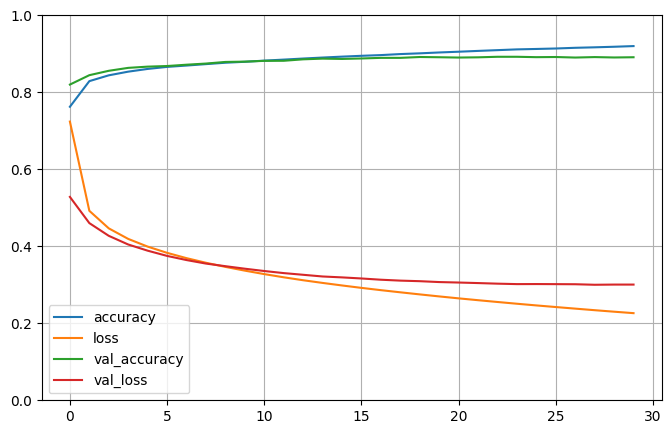

In [104]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [107]:
model.evaluate(X_test, y_test)
# loss, accuracy tuple is returned

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8787 - loss: 0.3459


[0.34169045090675354, 0.8804000020027161]

In [108]:
X_new = X_test[:3]

In [109]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [114]:
y_pred = model.predict_classes(X_new) # predict_classes is removed from the package
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [115]:
import numpy as np

# Assuming model is your trained model and X_new is your new input data
y_pred_prob = model.predict(X_new)  # Get probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Get the class with the highest probability for each input

print(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[9 2 1]


In [116]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

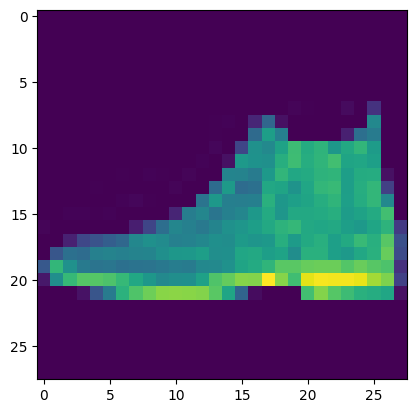

In [118]:
plt.imshow(X_test[0])

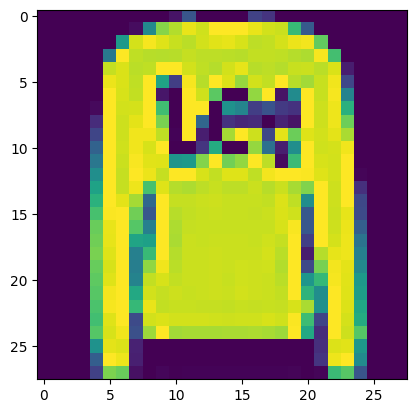

In [119]:
plt.imshow(X_test[1])

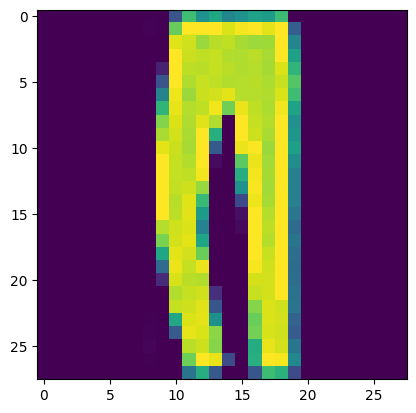

In [120]:
plt.imshow(X_test[2])